# Introducción a Matplotlib 

[Matplotlib](https://matplotlib.org/) es una librería de Python para hacer gráficos en dos dimensiones de alta calidad y altamente configurables. Tiene excelente integración con otras librerías como pandas y numpy

Adicionalmente matplotlib se integra con Jupyter mediante la magia `%matplotlib backend`. Entre las opciones de backend se encuentran
    
- `inline` : Gráficos rasterizados en el notebook/lab
- `notebook` : Gráficos interactivos en el notebook
- `ipympl`: Gráficos interactivos en jupyter lab y vscode
- `qt`, `gtk`, `osx` : Gráficos en una ventana emergente 

Puedes consultar más información sobre esta magia en un terminal de IPython usando:

```python
%matplotlib?
```

**Instalación**
    
Con nuestro ambiente conda activado

    conda install matplotlib
    
O si usamos jupyterlab/VSCode

    conda install matplotlib ipympl

**Importar**

In [1]:
# Invocamos la magia con una de las opciones de backend
%matplotlib inline
# Importamos la librería
import matplotlib as mpl
display(mpl.__version__)
import matplotlib.pyplot as plt

'3.5.1'

El modulo `pyplot` provee 

- Funciones para crear distintos tipos de gráficos
- Una maquina de estados que añade los diversos elementos que queremos incluir en él

A continuación vamos a revisar ambos

## Nuestra primera figura en matplotlib

Consideremos los siguientes datos que representan el número de casos covid19 positivos totales desde el 22 de Enero de 2020 hasta el 13 de Mayo de 2020

In [2]:
import pandas as pd

data_covid = pd.read_csv("data/covid19_extract.csv").drop(["Lat", "Long", "Province/State"], axis=1)
data_covid.set_index("Country/Region", inplace=True)
data_covid

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Argentina,0,0,0,0,0,0,0,0,0,0,...,4887,5020,5208,5371,5611,5776,6034,6278,6563,6879
Bolivia,0,0,0,0,0,0,0,0,0,0,...,1681,1802,1886,2081,2266,2437,2556,2831,2964,3148
Brazil,0,0,0,0,0,0,0,0,0,0,...,108620,115455,126611,135773,146894,156061,162699,169594,178214,190137
Chile,0,0,0,0,0,0,0,0,0,0,...,20643,22016,23048,24581,25972,27219,28866,30063,31721,34381


Un gráfico de línea en matplotlib se dibuja con la función `plot`

Por ejemplo

```python
plt.plot(a)
```

dibujará `a` en el eje vertical y `range(len(a))` en el eje horizontal

Mientras que

```python
plt.plot(x, y)
```
    
dibujará `y` en el eje vertical y `x` en el eje horizontal


:::{note}

Usamos un gráfico de línea para estudiar como cambia una variable en función de otra o en función del tiempo (orden)

:::

Por ejemplo

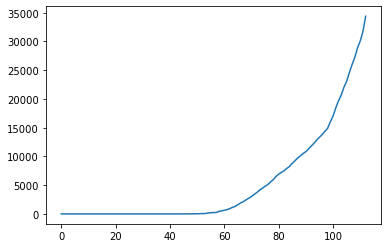

In [3]:
data_chile = data_covid.loc["Chile"].values
plt.plot(data_chile);

Podemos especificar el color, ancho, estilo, transparencia, entre otros:

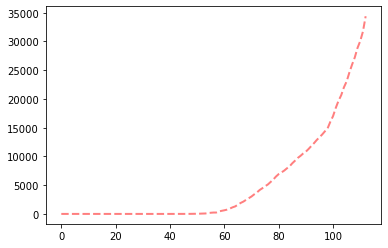

In [4]:
plt.plot(data_chile, color='r', linestyle='--',  linewidth=2, alpha=0.5);

Notar que en IPython llamar a `plot` genera inmediatamente la figura. Si se usa el intérprete normal de Python la figura se mostrará sólo luego de usar la instrucción `plt.show()`


:::{note}

Si se usa el backend `notebook` o `ipympl` se añade una barra de herramientas que permite manipular interactivamente el gráfico 

:::

## Creación de figuras, ejes y artistas

Figura (Figure)
: Es el elemento principal, actua como un lienzo que mantiene los demás elementos

Ejes (Axes)
: Representan el sistema de coordenadas y puede haber más de uno por figura

Artista (Artist)
: Son los objetos que podemos dibujar en los ejes. Los artistas se agregan y modifican utilizando métodos de la clase Axes

    
Anteriormente, al llamar `plot` creamos automaticamente un eje y una figura

Para tener mayor control sobre nuestro gráfico podemos crear una figura y un conjunto de ejes usando `figure` o `subplots`


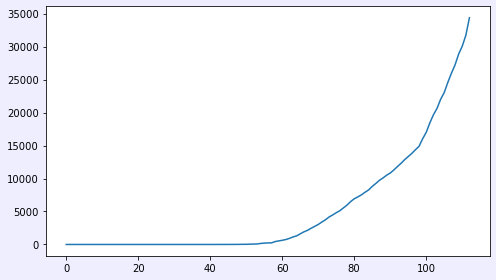

In [5]:
# Especificamos el tamaño y el color de fondo
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='#EEF')
ax.plot(data_chile);

La siguiente figura de la documentación de matplotlib resume los elementos principales que podemos modificar

<a href="https://matplotlib.org/examples/showcase/anatomy.html"><img src="https://matplotlib.org/_images/anatomy.png" width="600"></a>


A continuación se muestra como acceder a cada uno de estos elementos

In [6]:
data_argentina = data_covid.loc["Argentina"].values
data_bolivia = data_covid.loc["Bolivia"].values

En matplotlib podemos agregar varios artistas en un mismo eje. Esto se hace llamando sucesivamente los métodos de un cierto eje que hayamos creado, por ejemplo

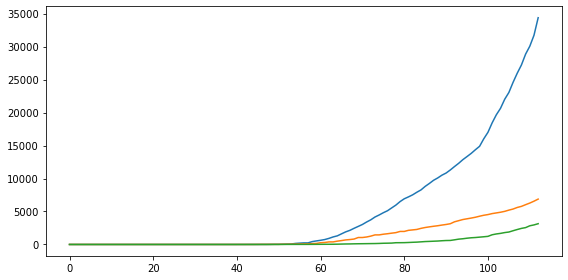

In [7]:
fig, ax = plt.subplots(figsize=(8, 4), tight_layout=True, facecolor='w')
ax.plot(data_chile)
ax.plot(data_argentina)
ax.plot(data_bolivia);

:::{note}

Los  colores van rotando automáticamente

:::

Se puede seleccionar manualmente el color utilizando el argumento `c` de `plot`, por ejemplo

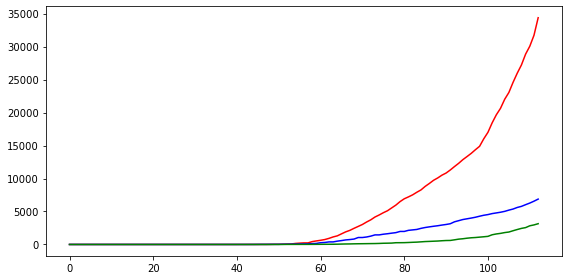

In [8]:
fig, ax = plt.subplots(figsize=(8, 4), tight_layout=True, facecolor='w')
ax.plot(data_chile, c='red')
ax.plot(data_argentina, c='blue')
ax.plot(data_bolivia, c='green');

`plot` también recibe los argumentos

- `linewidth` o `lw`: Ancho de línea
- `linestyle` o `ls`: Estilo de la línea (`'-'`, `'--'`, `'-.'` y `'none'`)
- `marker` y `markersize`: Para especificar el tipo y tamaño de los marcadores
- `alpha`: Opacidad de la línea (entre 0 y 1)
- `label`: Nombre de la linea

El nombre es útil si queremos agregar una leyenda a nuestra imagen, por ejemplo

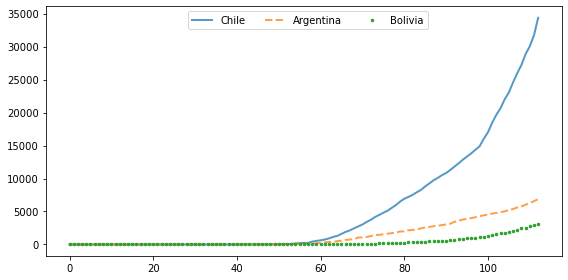

In [9]:
fig, ax = plt.subplots(figsize=(8, 4), tight_layout=True, facecolor='w')

ax.plot(data_chile, lw=2, alpha=0.75, label='Chile')
ax.plot(data_argentina, ls='--', lw=2, alpha=0.75, label='Argentina')
ax.plot(data_bolivia, ls='none', marker='.', markersize=5, label='Bolivia')

ax.legend(loc=1, ncol=3, bbox_to_anchor=(0.75, 1)); # Leyenda

:::{tip}

Acostúmbrese a rotular sus gráficos con títulos y etiquetas para los ejes

:::

A continuación se muestran las funciones para rotular ejes y algunos de los argumentos que aceptan

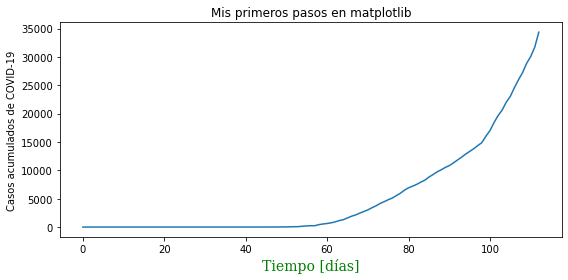

In [10]:
fig, ax = plt.subplots(figsize=(8, 4), tight_layout=True, facecolor='w')
ax.plot(data_chile)

# Texto para ejes y título
ax.set_xlabel('Tiempo [días]', fontsize=14, fontname='serif', color="green")
ax.set_ylabel('Casos acumulados de COVID-19')
ax.set_title('Mis primeros pasos en matplotlib');

Si necesitamos controlar la información a mostrar, podemos hacerlo sin necesidad de alterar nuestros datos con las funciones `set_xlim` y `set_ylim`. 

Matplotlib ofrece también gran control respecto de como se presentan la información de los ejes

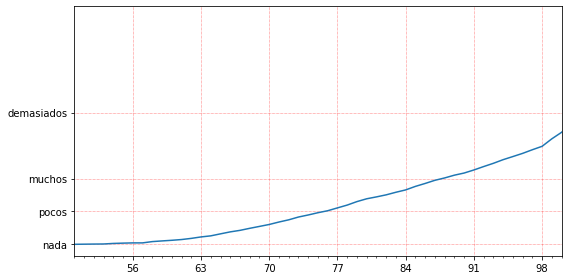

In [11]:
fig, ax = plt.subplots(figsize=(8, 4), tight_layout=True, facecolor='w')
ax.plot(data_chile)

# Límites de los ejes: set_xlim y set_ylim
ax.set_xlim([50, 100]) 

# Ticks de los ejes: set_xticks y set_yticks
ax.set_yticks([0, 5000, 10000, 20000])
# Etiquetas de los ejes
ax.set_yticklabels(['nada', 'pocos', 'muchos', 'demasiados'])
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(7))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))

# Grilla
ax.grid(color="red", which="major", axis='both', linestyle=':', linewidth=0.5);

### Posicionamiento de ejes

Podemos crear un eje en una posición específica de la figura. La posición se indica con cuatro valores ordenados como sigue:

- left (izquierda)
- bottom (abajo)
- width (ancho)
- height (alto)

Los valores deben estar entre 0 y 1, son relativos al tamaño de la figura

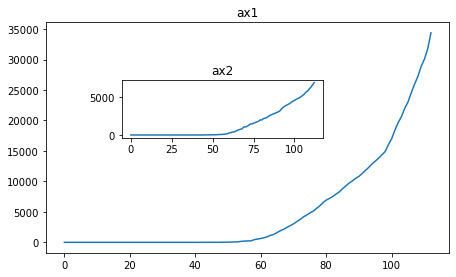

In [12]:
fig = plt.figure(figsize=(7, 4))
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax1.plot(data_chile)
ax1.set_title('ax1')
ax2 = fig.add_axes([0.25, 0.5, 0.4, 0.2])
ax2.plot(data_argentina)
ax2.set_title('ax2');

:::{note}

Podemos incluso crear un eje dentro de otro. Esto es útil si queremos destacar una parte específica del gráfico. Use este recurso con moderación ya que puede entorpecer la lectura del gráfico

:::

Si queremos múltiples ejes organizados como una tabla es más sencillo usar `subplots`. Si queremos comparar todas las figuras en la misma escala se pueden usar los argumentos `sharex` y `sharey`

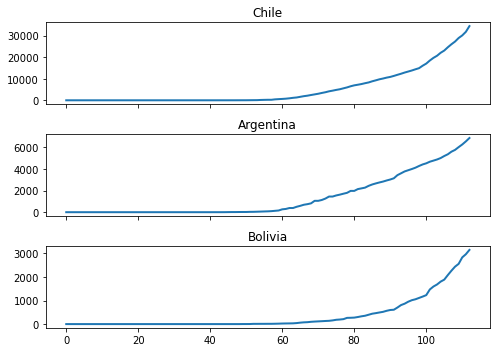

In [13]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(7, 5), 
                       sharex=True, sharey=False, tight_layout=True)
ax[0].plot(data_chile, lw=2)
ax[0].set_title('Chile')
ax[1].plot(data_argentina, lw=2)
ax[1].set_title('Argentina');
ax[2].plot(data_bolivia, lw=2)
ax[2].set_title('Bolivia');

Si necesitamos que los sub-ejes tengan distintos tamaños dentro de la "tabla" podemos utilizar `gridspec`

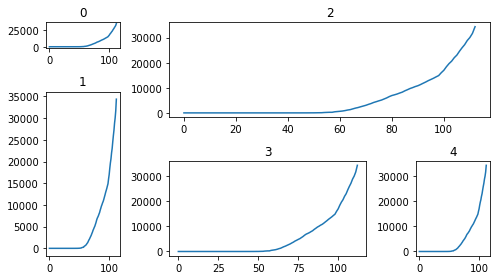

In [14]:
fig = plt.figure(figsize=(7, 4), facecolor='w', tight_layout=True)

gs = mpl.gridspec.GridSpec(4, 4)

ax = fig.add_subplot(gs[0, 0])
ax.plot(data_chile); ax.set_title('0')
ax = fig.add_subplot(gs[1:, 0])
ax.plot(data_chile); ax.set_title('1')
ax = fig.add_subplot(gs[0:2, 1:])
ax.plot(data_chile); ax.set_title('2')
ax = fig.add_subplot(gs[2:4, 1:3])
ax.plot(data_chile); ax.set_title('3')
ax = fig.add_subplot(gs[2:4, 3])
ax.plot(data_chile); ax.set_title('4');

### Escalas logarítmicas

Podemos modificar el escalamiento de los ejes de un gráfico tipo `plot` usando `set_xscale` o `set_yscale`, respectivamente

También podemos obtener el mismo efecto usando `semilogx`, `semilogy` y `loglog`, en lugar de `plot`

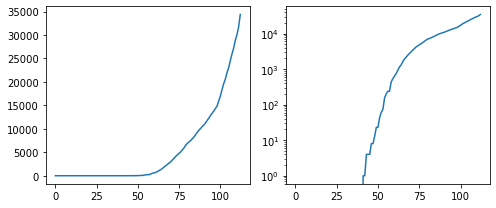

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3), tight_layout=True, facecolor='w')

ax[0].plot(data_chile)
ax[1].plot(data_chile)
ax[1].set_yscale('log')

# plot y set_yscale es equivalente a:
# ax[1].semilogy(data_chile)

### Anotaciones en un gráfico

Se puede usar `text` y `annotate` para agregar texto en posiciones arbitrarias


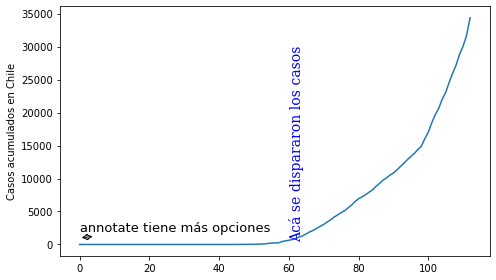

In [16]:
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')
ax.plot(data_chile)
ax.set_ylabel('Casos acumulados en Chile')

ax.text(x=60, y=1000, # Posicion
        s="Acá se dispararon los casos", # Contenido
        fontsize=14, color='blue', family="serif", # Customización de la fuente
        rotation=90)

ax.annotate('annotate tiene más opciones', # String
            xy=(0, 1000), xytext=(0, 2000), # Posicionamiento del texto y la flecha
            fontsize=13, # Tamaño de letra
            arrowprops=dict(arrowstyle="<->")); # Estilo de la flecha

## Configurando matplotlib

Matplotlib mantiene un diccionario llamado `rcParams`

Puedes ver las opciones disponibles con

```python
mpl.rcParams.keys()
```

Si hay opciones que siempre vamos a ocupar conviene escribirlas aquí. 

Por ejemplo:

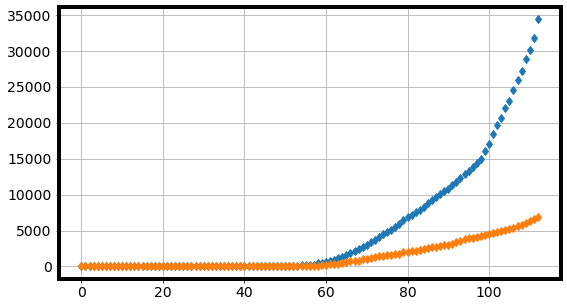

In [17]:
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.linewidth'] = 4
mpl.rcParams['lines.linewidth'] = 0
mpl.rcParams['font.size'] = 14
mpl.rcParams['lines.marker'] = 'd'
mpl.rcParams['lines.markersize'] = 6
mpl.rcParams['figure.figsize'] = (9, 5)
# Ya no es necesario indicar estas opciones en cada gráfica

plt.figure()
plt.plot(data_chile) 
plt.plot(data_argentina);

También podemos escoger el estilo general de nuestras gráficas a partir de estilos predefinidos de matplotlib que pueden revisarse con

```python
sorted(mpl.style.available)
```

Por ejemplo

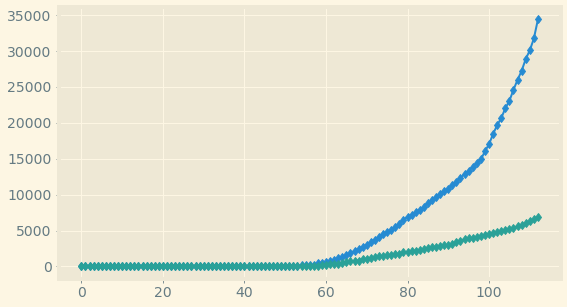

In [18]:
plt.style.use('Solarize_Light2')

plt.figure()
plt.plot(data_chile) 
plt.plot(data_argentina);

## Más allá de matplotlib

Existen muchas librerías de Python para hacer visualizaciones y gráficas. 

Matplotlib es la más utilizada pero dependiendo de las necesidades de tu experimento/aplicación te recomiendo que consideres las siguientes alternativas

- [Seaborn](https://seaborn.pydata.org/): Seaborn es una librería de visualización que utiliza matplotlib como backend. Provee más opciones de gráficos y tienen una apariencia por defecto más moderna y acabada. Además se integra mejor con la librería `pandas`
- [Bokeh](https://bokeh.pydata.org/en/latest/), [Holoviews](http://holoviews.org/) y [Dash](https://dash.plot.ly/installation): Permiten crear visualizaciones interactivas en bases de datos grandes. Son mucho más eficientes que matplotlib pero también un poco más complejas de utilizar.
- [Datashader](http://datashader.org/) Permite crear visualización sobre bases de datos masivas que no caben en memoria RAM. 
- [Vispy](http://vispy.org/): Crea visualizaciones aceleradas por GPU basadas en OpenGL
 